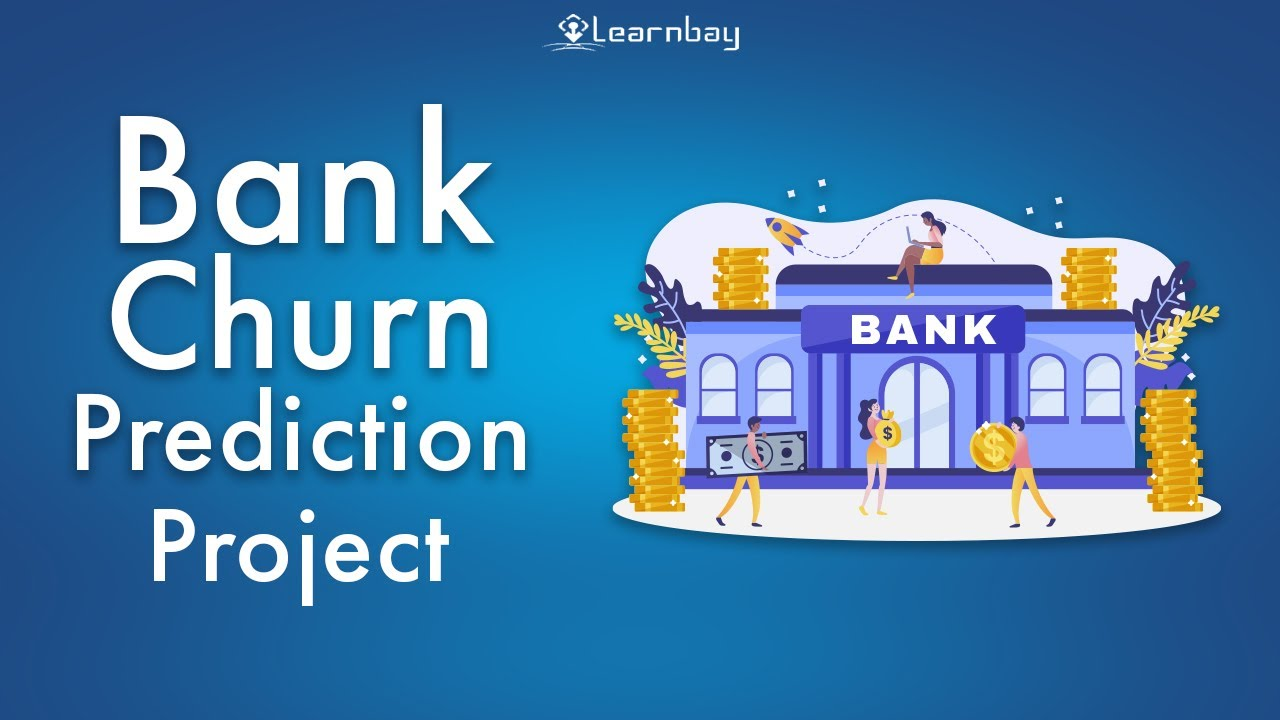

#1.Imports necessary libraries

In [9]:
#Exploratory & visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Libraries for ML models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings  # Import the warnings module
warnings.filterwarnings('ignore')

#Loading the Data set

In [10]:
bank=pd.read_csv('/content/Bank Customer Churn Prediction.csv')

#Understanding and Exploring the data

In [ ]:
#First five row of data
bank.head(5)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


There are 10,000 rows and 12 column

In [ ]:

bank.shape

(10000, 12)

Data types , floats (2) ,intengers(8) and bojects (2)

In [ ]:

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


The average age of bank account holders is about 39,those in their prime working live are between 24 t0 54.
Minumum age of bank account holders is 18, those just entering the labour market following education.
The maximum age is 92, those are likely to be in retirement and receiving pensions. Count are  all the same , not expecting any null values .

In [ ]:

bank.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#Data Cleaning.

There are no missing values

In [ ]:

bank.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Columns with no effect on Churn will be dropped

In [ ]:

bank.drop('customer_id',
  axis='columns', inplace=True)

There no duplicates

In [ ]:

bank.duplicated().sum()

0

Changing mismatched variavles

In [ ]:
bank['products_number'] = bank['products_number'].astype('category')

In [ ]:
bank['credit_card'] = bank['credit_card'].astype('category')

In [ ]:
bank['active_member'] = bank['active_member'].astype('category')

In [ ]:
bank['churn'] = bank['churn'].astype('category')

In [ ]:
bank['gender']=bank['gender'].astype('category')

In [ ]:
numeric_columns = bank.select_dtypes(include=np.number).columns

In [ ]:
numeric_columns

Index(['credit_score', 'age', 'tenure', 'balance', 'estimated_salary'], dtype='object')

#3. Univariate Analysis

In [ ]:
categorical=['active_member','credit_card','products_number','gender']

 1. Gender, credit, and active member are at the same level which is to be expected as they would have a positive correlation
2. Each customer can patronize several products at once, so there would be a peak in product numbers.

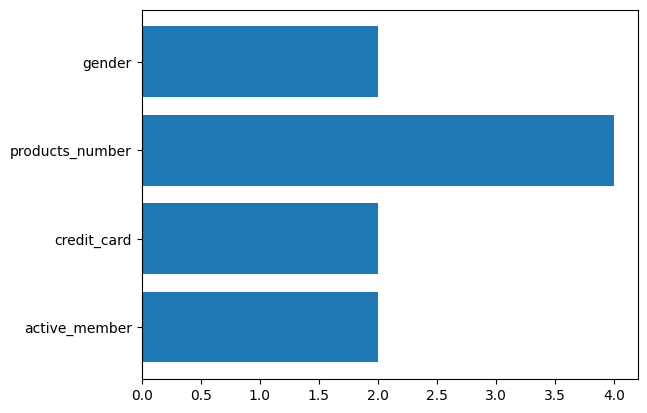

In [ ]:

plt.barh(categorical,bank[categorical].nunique())
plt.show()

The highest peaks are between ages 28 and 40, this is the ages that would have a lot of transactions.

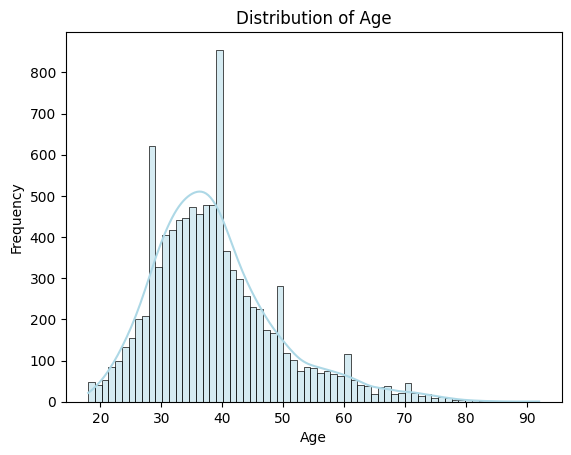

In [ ]:

sns.histplot(x=bank['age'], color='lightblue', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
figure_size=(1,1)

Credit score has an almost asymmetrical curve shape, so an even distribution, with an above 800 credit score peak, could be a high net income customer.

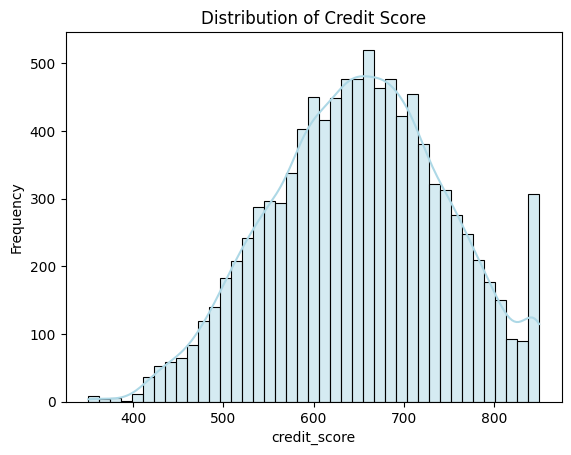

In [ ]:

sns.histplot(x=bank['credit_score'], color='lightblue', kde=True)
plt.xlabel('credit_score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')
figure_size=(1,1)

The frequency of tenure between 1-9 is almost even so initial customers patronize the bank for a long time but at about 10 start to decline.

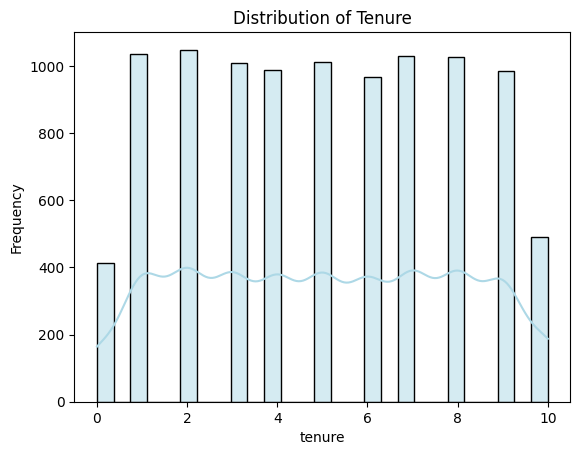

In [ ]:

sns.histplot(x=bank[ 'tenure'], color='lightblue', kde=True)
plt.xlabel( 'tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
figure_size=(1,1)

There are a lot of initial customers that have zero balances, but customers tend to maintain stable balances after, the distribution curve is almost symetrical.

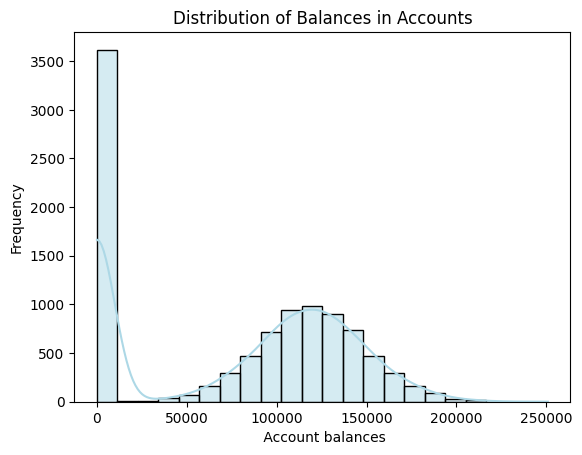

In [ ]:

sns.histplot(x=bank[ 'balance'], color='lightblue', kde=True)
plt.xlabel( ' Account balances')
plt.ylabel('Frequency')
plt.title('Distribution of Balances in Accounts')
figure_size=(1,1)

Estimated salaries have an even distribution, the bank could be located in a specific locality with high-income earner

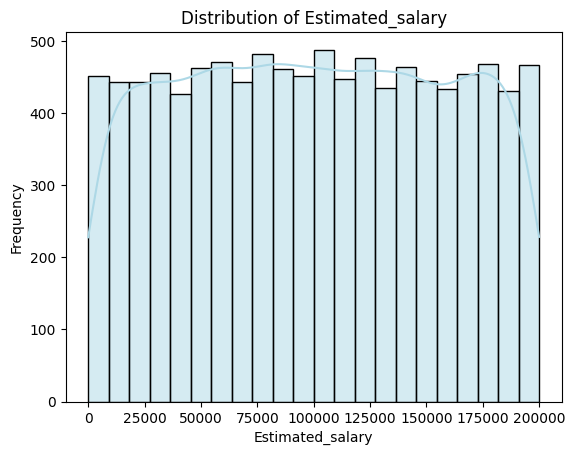

In [ ]:

sns.histplot(x=bank[ 'estimated_salary'], color='lightblue', kde=True)
plt.xlabel( 'Estimated_salary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated_salary')
figure_size=(1,1)

#4. Bivariate Analysis

There is a low churn based on these features, the bank does have too many customers leaving

In [ ]:
categorical=['active_member','credit_card','products_number','gender']

In [ ]:
list(enumerate(categorical))

[(0, 'active_member'),
 (1, 'credit_card'),
 (2, 'products_number'),
 (3, 'gender')]

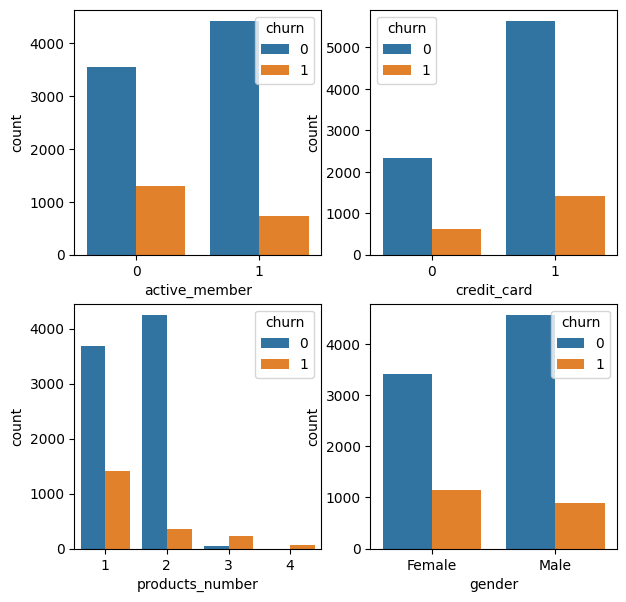

In [ ]:

plt.figure(figsize=(7,7))
for i in enumerate(categorical):
  plt.subplot(2,2,i[0]+1)
  sns.countplot(x=i[1],hue='churn',data=bank)

There is a significant churn in customers

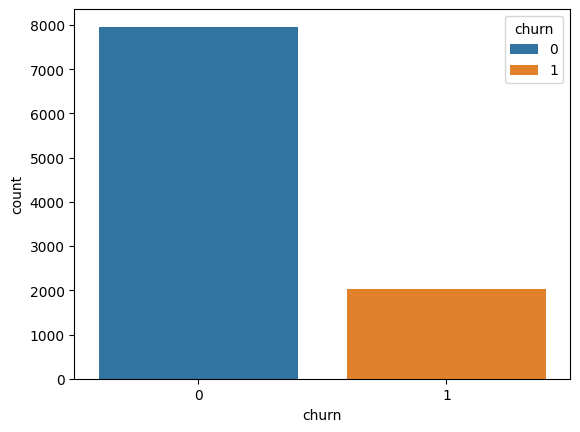

In [11]:
sns.countplot(x='churn',hue='churn',data=bank)
figure_size=(0.05,0.05)

The bank may be a French bank with subsidiaries in Spain and Germany, with low churn in each respective country.

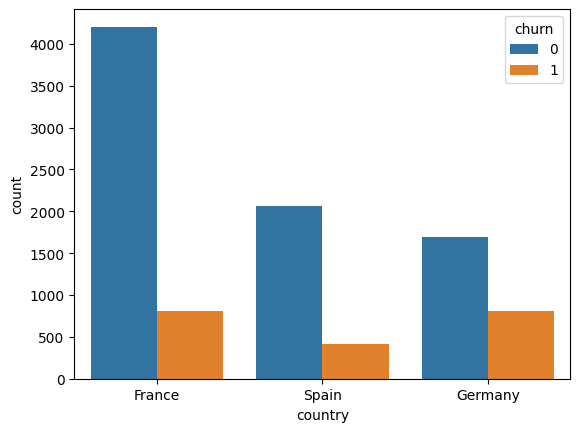

In [ ]:

sns.countplot(x='country',hue='churn',data=bank)
figure_size=(0.05,0.05)

In [ ]:
numeric_columns = bank.select_dtypes(include=np.number).columns
numeric_columns

Index(['credit_score', 'age', 'tenure', 'balance', 'estimated_salary'], dtype='object')

Box plots are used to determine if outliers are present.

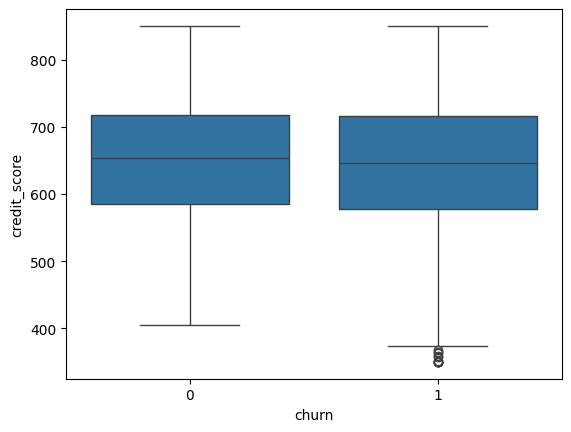

In [ ]:

sns.boxplot(x='churn',y='credit_score',data=bank)
figure_size=(0.1,0.1)

Age has the most significant outliers.

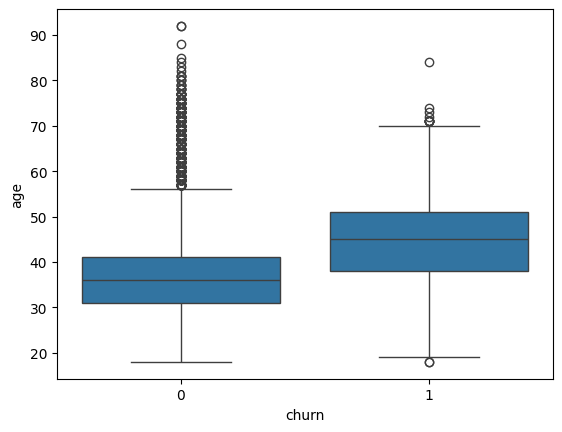

In [ ]:

sns.boxplot(x='churn',y='age',data=bank)
figure_size=(0.1,0.1)

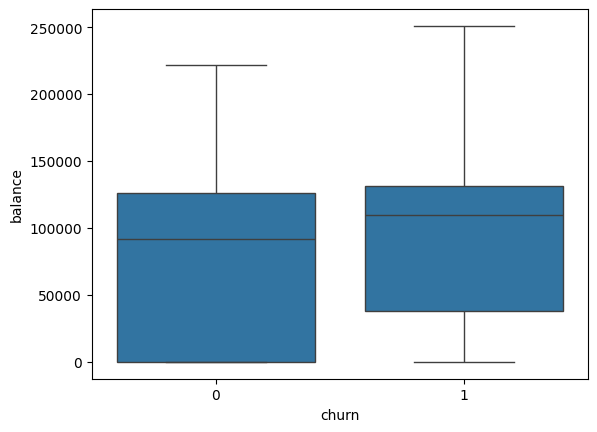

In [ ]:
sns.boxplot(x='churn',y='balance',data=bank)
figure_size=(0.1,0.1)

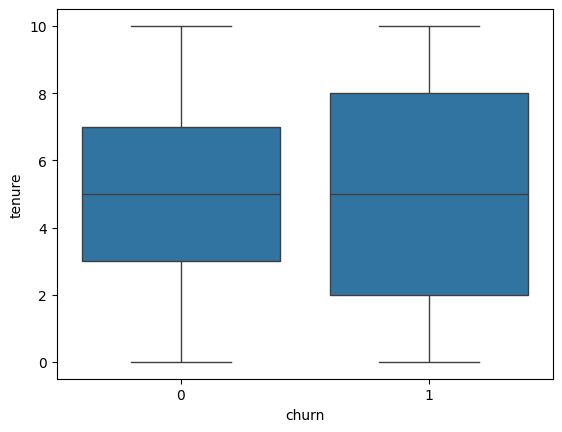

In [ ]:
sns.boxplot(x='churn',y='tenure',data=bank)
figure_size=(0.1,0.1)

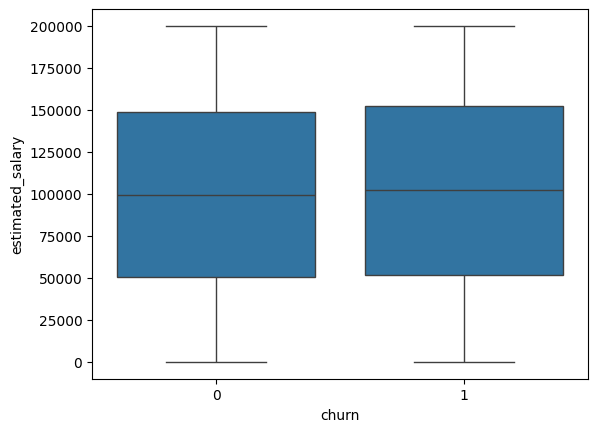

In [ ]:
sns.boxplot(x='churn',y='estimated_salary',data=bank)
figure_size=(0.1,0.1)

#5. Correlation Analysis:

In [ ]:
numeric_columns = [col for col in numeric_columns if bank[col].dtype != 'object' ]
numeric_columns

['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

Weak positive correlation between numerical variables.

In [ ]:

corr=bank[numeric_columns].corr()
corr

,credit_score,age,tenure,balance,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,0.012797
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,1.000000


 Mostly negative correlation between numerical variables.

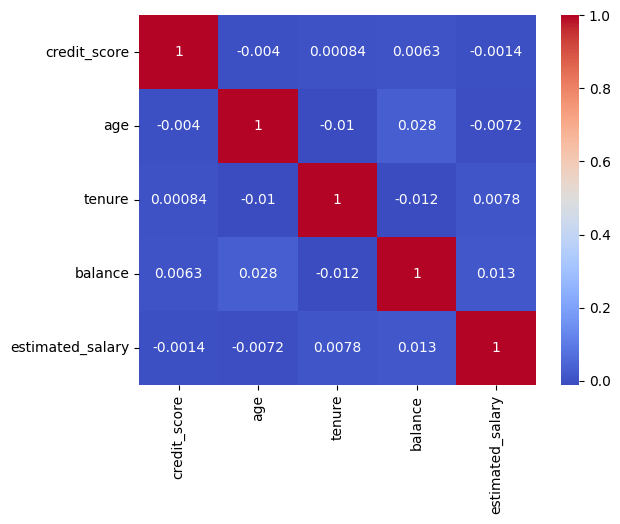

In [ ]:

sns.heatmap(corr,annot=True,cmap='coolwarm')
figure_size=(0.1,0.1)
x_label_rotation=90
y_label_rotation=0

#6. Visualize Relationships:

 Three of the Diagonal Bar graphs follow a normal distribution curve, with some outliers in each feature.
Scatter plots do not show a pattern of data point ,there mostly clustered together, doesnt not show a significant correlation.

interactive(children=(FloatSlider(value=2.5, description='height', max=5.0, min=0.5), FloatSlider(value=1.0, d…

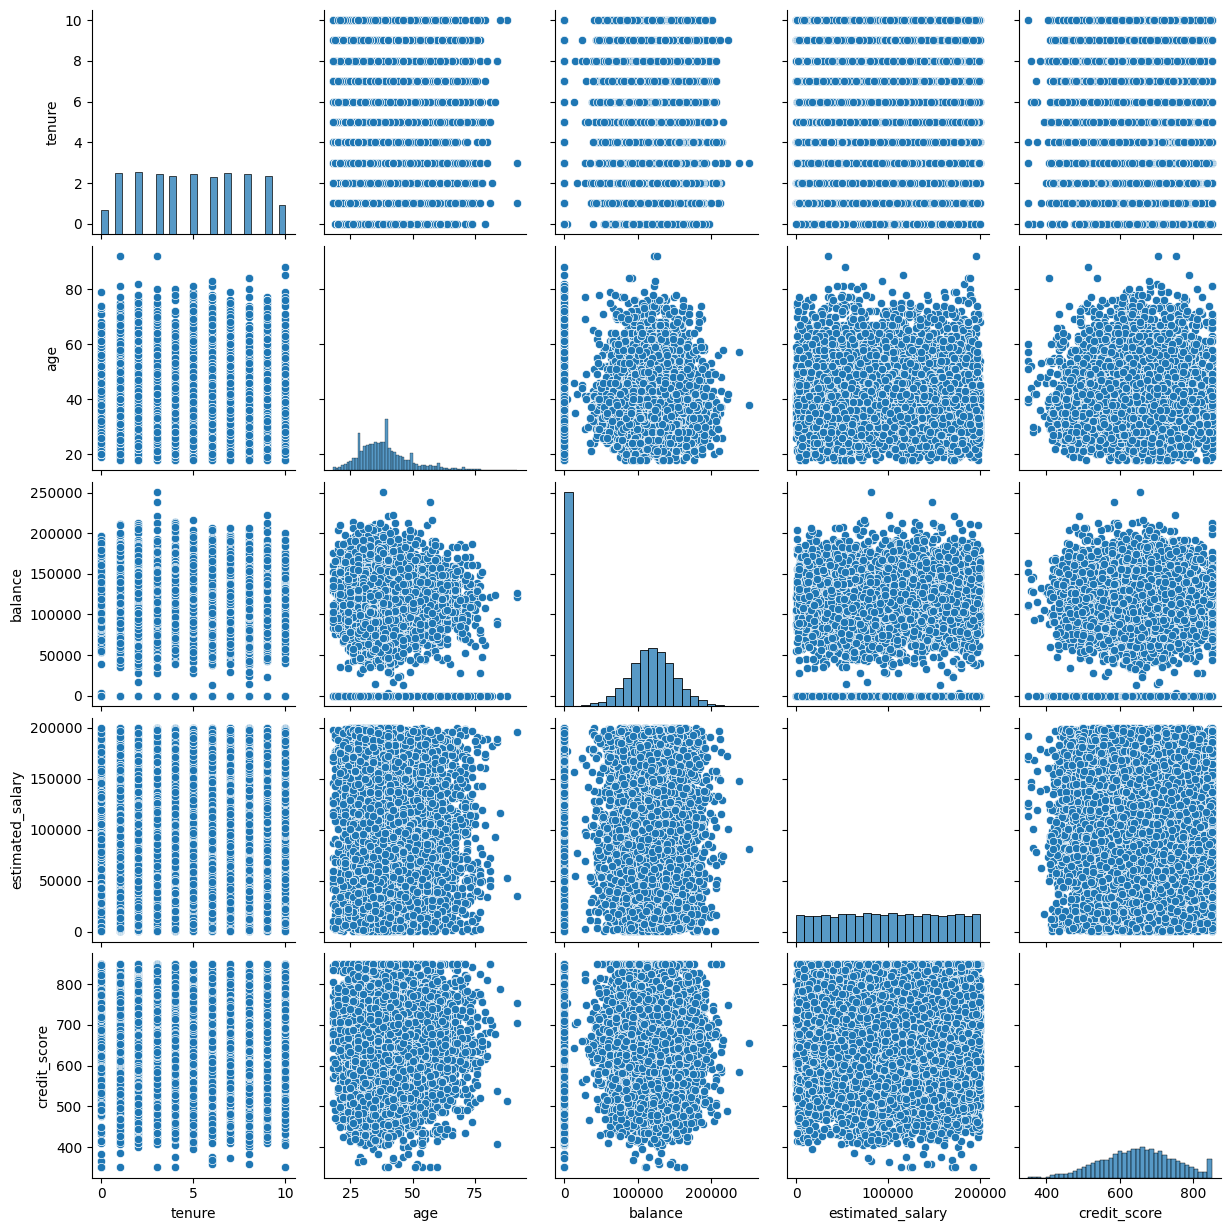

In [ ]:

from ipywidgets import interact
@interact(height=(0.5, 5.0), aspect=(0.5, 2.0))
def size_widget(height=2.5, aspect=1.0):
    sns.pairplot(data=bank, vars={'credit_score', 'age', 'tenure', 'balance', 'estimated_salary'})

Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
print(label)

LabelEncoder()


In [ ]:
#Encoding all non-numerical variables
columns_to_encode=['active_member','credit_card','products_number','gender','country','churn']
for column in columns_to_encode:
 bank[column]=label.fit_transform(bank[column])

In [ ]:
#There is a negative correlation between churn and all features, so expect a low churn rate.
corr=bank[columns_to_encode].corr()
corr

,active_member,credit_card,products_number,gender,country,churn
active_member,1.000000,-0.011866,0.009612,0.022544,0.006724,-0.156128
credit_card,-0.011866,1.000000,0.003183,0.005766,-0.008523,-0.007138
products_number,0.009612,0.003183,1.000000,-0.021859,0.003972,-0.047820
gender,0.022544,0.005766,-0.021859,1.000000,0.004719,-0.106512
country,0.006724,-0.008523,0.003972,0.004719,1.000000,0.035943
churn,-0.156128,-0.007138,-0.047820,-0.106512,0.035943,1.000000


In [ ]:
#There is a negative correlation between churn and all features, so expect a low churn rate.
corr=bank.corr()
corr

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

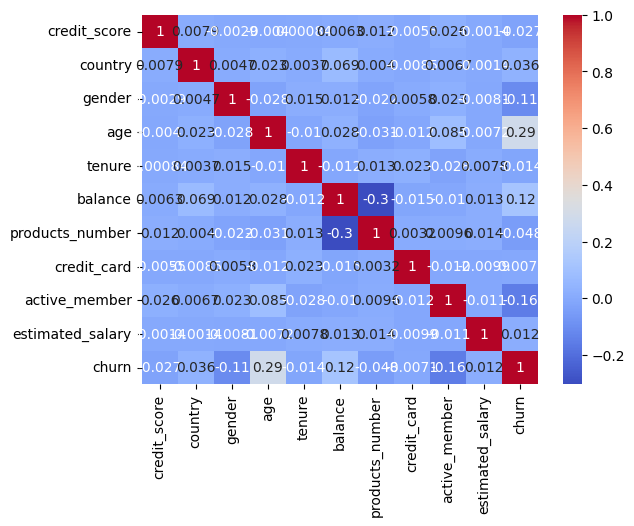

In [ ]:
#The heat map further emphasizes the negative correlation between features and target (churn)
sns.heatmap(corr,annot=True,cmap='coolwarm')

#Churn Prediction Modeling

Dealing with significant outliers.

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = bank['age'].quantile(0.25)
Q3 = bank['age'].quantile(0.75)
IQR = Q3 - Q1
IQR


12.0

In [ ]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print (lower_bound)
print (upper_bound)

14.0
62.0


In [ ]:
#Identify outliers
outliers = bank[(bank['age'] < lower_bound) | (bank['age'] > upper_bound)]

In [ ]:
# Trimming Outliers
bank_no_outliers = bank[(bank['age'] >= lower_bound) & (bank['age'] <= upper_bound)]

In [ ]:
bank['age'] = np.where(bank['age'] < lower_bound, lower_bound, bank['age'])
bank['age'] = np.where(bank['age'] > upper_bound, upper_bound, bank['age'])

<Axes: ylabel='age'>

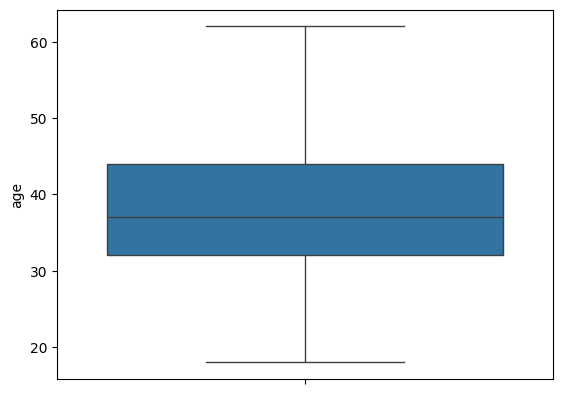

In [ ]:
sns.boxplot(bank["age"])

In [ ]:
bank.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [ ]:
X10=bank.drop(['churn'],axis=1)


In [ ]:
Y=bank['churn']

Features Selection;
Filter Method (Information Gain): Reflects information gain on the target variable would be strongest about "age" &"product number" features.

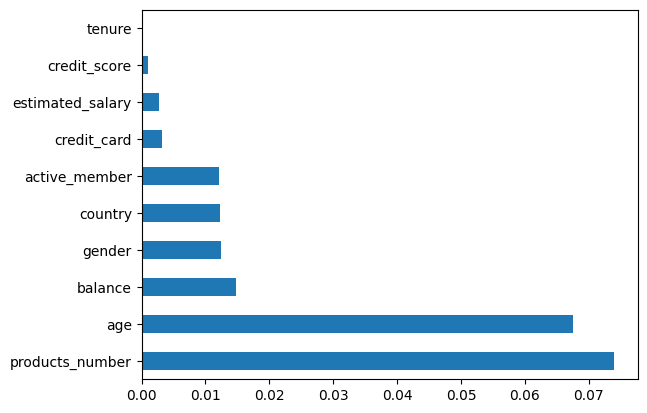

In [ ]:

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
Y=bank['churn']
importances = mutual_info_classif(X10, Y)
feat_imp = pd.Series(importances, index=X10.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

#Model Training

In [ ]:
# Split the data into features (X) and target (y)
X= bank[[ 'country', 'gender', 'age', 'balance','products_number', 'active_member', 'estimated_salary','credit_score']]

In [ ]:
y=bank['churn']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=17 , test_size=0.25)

Random Forest Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0 , test_size=0.2)

In [ ]:
rf= RandomForestClassifier(n_estimators=5)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
y_pred = rf.predict(X)

In [ ]:
rf.score(X_test,y_test)

0.838

In [ ]:
con_matrix = confusion_matrix(y_test,y_pred)
print(con_matrix)

[[1595    0]
 [ 405    0]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



In [ ]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.8003243159564998

In [13]:
CR= 406/(1595+405 )
CR

0.203

In [ ]:
#prediction of probabilities
rf_probs=[0 for _ in range(len(y_test))]
rf_probs=rf.predict_proba(X_test)
lr_probs=LR.predict_proba(X_test)
dt_probs=classifier.predict_proba(X_test)
kn_probs=kn.predict_proba(X_test)
nb_probs=nb.predict_proba(X_test)

In [ ]:
rf_probs=rf_probs[:,1]
lr_probs=lr_probs[:,1]
dt_probs=dt_probs[:,1]
kn_probs=kn_probs[:,1]
nb_probs=nb_probs[:,1]

In [ ]:
#Calculate AUROC
rf_auc=roc_auc_score(y_test,rf_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
dt_auc=roc_auc_score(y_test,dt_probs)
kn_auc=roc_auc_score(y_test,kn_probs)
nb_auc=roc_auc_score(y_test,nb_probs)

In [ ]:
print('Random Forest: AUROC=%.3f' % (rf_auc))
print('Logistic Regression: AUROC=%.3f' % (lr_auc))
print('Decision Tree: AUROC=%.3f' % (dt_auc))
print('KNN: AUROC=%.3f' % (kn_auc))
print('Naive Bayes: AUROC=%.3f' % (nb_auc))

Random Forest: AUROC=0.800
Logistic Regression: AUROC=0.681
Decision Tree: AUROC=0.691
KNN: AUROC=0.519
Naive Bayes: AUROC=0.756


In [ ]:
#predicting the test set results
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)


In [ ]:
#ploting ROC
def plot_roc_curve(fpr, tpr):
    plt.plot(rf_fpr,marker= '.',label='Random Forest: (AUROC=%.3f)' % rf_auc)
    plt.plot(lr_fpr,marker= '.',label='Logistic Regression: (AUROC=%.3f)' % lr_auc)
    plt.plot(dt_fpr,marker= '.',label='Decision Tree: (AUROC=%.3f)' % dt_auc)
    plt.plot(kn_fpr,marker= '.',label='KNN: (AUROC=%.3f)' % kn_auc)
    plt.plot(nb_fpr,marker= '.',label='Naive Bayes: (AUROC=%.3f)' % nb_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

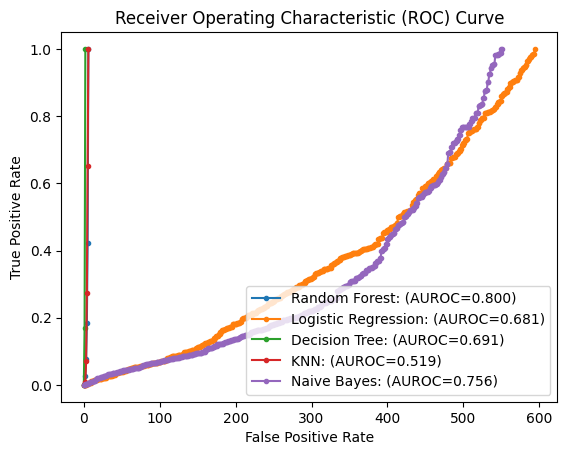

In [ ]:
plot_roc_curve(rf_fpr, rf_tpr)

In [ ]:
#plt.savefig('roc_results_ratios.png')

In [ ]:
#Random Forest Curve

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(rf_fpr,marker= '.',label='Random Forest: (AUROC=%.3f)' % rf_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(' ROC Curve (Random Forest)')
    plt.legend(loc='lower right')
    plt.show()

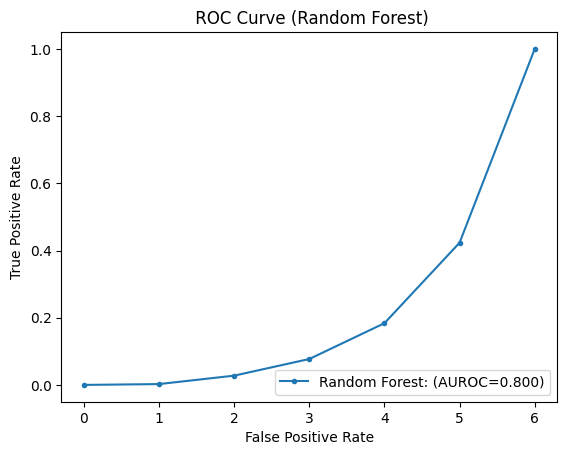

In [ ]:
plot_roc_curve(rf_fpr, rf_tpr)

#Summarize Findings:

The dataset contains information on 10,000 customers with 12 features, including demographic data, account information, and usage patterns.

There were no missing values in the data set.

The average customer tenure is about 5 years with a standard deviation of 2.89 years, The maximum estimated salary is about 199,992.48 dollars  and the minimum is 11.58 dollars

The credit score distribution and age is an even distribution, with peak age between 40 to 41 years and credit score peak at about 650 . A few outliers have a credit score over 850.

There are weak positive correlation observed Features and target, for instance 'Age' and 'churn' (correlation coefficient: 0.285323).

 Negative correlation noted between "tenure" and "churn", (-0.014001) indicating longer-tenured customers are less likely to churn.

Senior citizens and customers without dependents are more likely to churn.

Customers with longer tenure and patronizing more products show lower churn
rates.

Random Forest Model gives the best results for customer Churn Prediction .

The over all churn rate as per random Forest model is sinificant , 20.3% , canpaigngs or measures need to be imprimented to reduce the rate of churn



